In [2]:
import pandas as pd

In [3]:
#Load Csv File
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

In [4]:
#Check For Missing Values In Each Column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
#Compute Missing Percentages
missing_pct=(df.isnull().sum() / len(df) ) *100

In [6]:
# Filter out columns with 0% missing data
missing_pct = missing_pct[missing_pct > 0]

# Convert the series to DataFrame
missing_pct_df = missing_pct.reset_index()

In [7]:
# Rename the columns for DataFrame
missing_pct_df.columns = ['Column', 'Missing_Percentage']

In [8]:
missing_pct_df

,Column,Missing_Percentage
0,Age,19.865320
1,Cabin,77.104377
2,Embarked,0.224467


In [9]:
#As %of missing entries are greater than 50 for Cabin, drop it
df.drop(columns='Cabin',  inplace=True)

In [10]:
# List of columns with missing values
mis_columns = ['Age', 'Embarked']

# Create an empty list to store the column names and their modes
mode_list = []

# Iterate through each column in the columns
for column in mis_columns:
    mode_value = df[column].mode()[0]  # Get the mode of the column
    mode_list.append([column, mode_value])  # Append column and its mode to the list

    # Fill missing values in the column with its mode and assign it back to the DataFrame
    df[column] = df[column].fillna(mode_value)

# Create a DataFrame from the mode_list
mode_df = pd.DataFrame(mode_list, columns=['Column', 'Mode'])

In [11]:
mode_df

,Column,Mode
0,Age,24.0
1,Embarked,S


In [12]:
#dataset for modeling
df_encoded = df.copy()
df_encoded.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [13]:
df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [14]:
#Designate columns for one hot encoding
hot_columns = ['Pclass', 'Sex',  'Embarked']

In [15]:
df_encoded = pd.get_dummies(df_encoded, columns=hot_columns, drop_first=True)
df_encoded

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,False,True,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,False,True
3,1,35.0,1,0,53.1000,False,False,False,False,True
4,0,35.0,0,0,8.0500,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,True,False,True,False,True
887,1,19.0,0,0,30.0000,False,False,False,False,True
888,0,24.0,1,2,23.4500,False,True,False,False,True
889,1,26.0,0,0,30.0000,False,False,True,False,False


In [16]:
#Place Numerical Columns To Be Scaled In A List
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [19]:
df_encoded[numerical_columns].describe()

,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,5.980999e-17,4.386066e-17,5.382900e-17,3.987333e-18
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.133613e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,-4.977933e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,-3.461881e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,4.876403e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,3.898757e+00,6.784163e+00,6.974147e+00,9.667167e+00


In [20]:
df_encoded

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,-0.497793,0.432793,-0.473674,-0.502445,False,True,True,False,True
1,1,0.715048,0.432793,-0.473674,0.786845,False,False,False,False,False
2,1,-0.194583,-0.474545,-0.473674,-0.488854,False,True,False,False,True
3,1,0.487640,0.432793,-0.473674,0.420730,False,False,False,False,True
4,0,0.487640,-0.474545,-0.473674,-0.486337,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,-0.118780,-0.474545,-0.473674,-0.386671,True,False,True,False,True
887,1,-0.725201,-0.474545,-0.473674,-0.044381,False,False,False,False,True
888,0,-0.346188,0.432793,2.008933,-0.176263,False,True,False,False,True
889,1,-0.194583,-0.474545,-0.473674,-0.044381,False,False,True,False,False


In [21]:
df_encoded.to_csv('/content/drive/MyDrive/cleaned-titanic.csv')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:

#use same logic for pclass, sex and embarked
class_counts= df['Pclass'].value_counts()

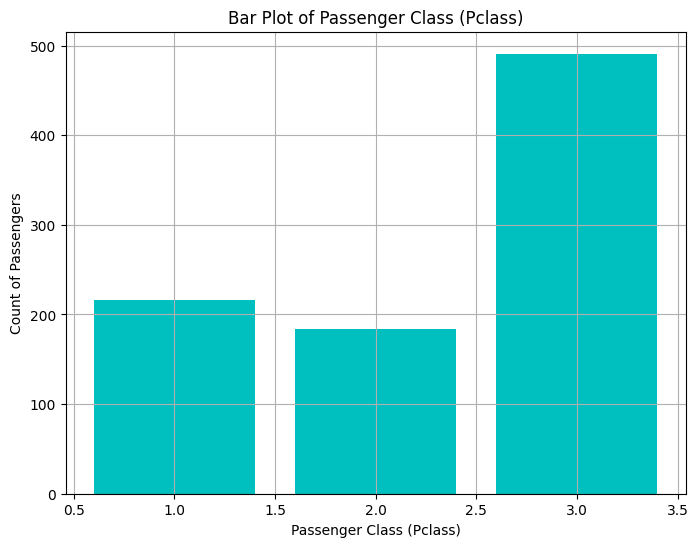

In [44]:

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color='c')
plt.title('Bar Plot of Passenger Class (Pclass)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count of Passengers')
plt.grid(True)

# Show the plot
plt.show()

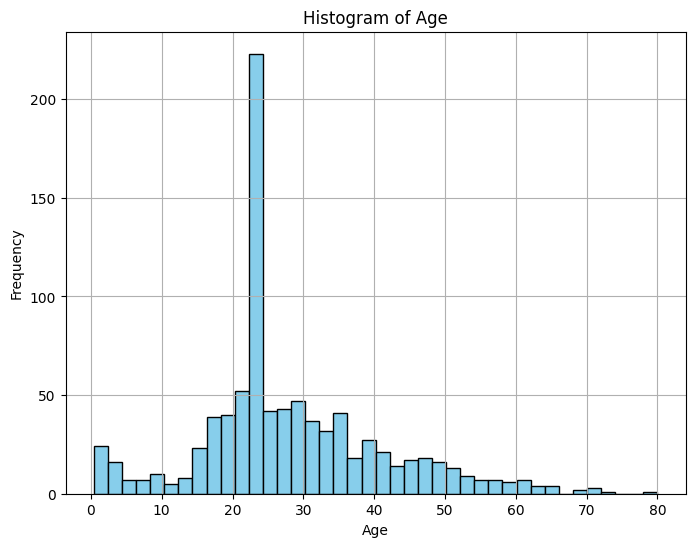

In [26]:
# Create a histogram
age_data =df['Age']
plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=40, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

DATA MODELING

In [27]:
dataset=df_encoded.copy()

In [28]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (Y)
X = dataset.drop('Survived', axis=1)  # Features (all columns except the target)
y = dataset['Survived']  # Target (Y)

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
print("Training set target distribution:\n", y_train.value_counts(normalize=True))
print("Test set target distribution:\n", y_test.value_counts(normalize=True))

Training set target distribution:
 Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Test set target distribution:
 Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


In [30]:
#class_weight='balanced' will be used since our dataset target Y was originally skewed.

from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(class_weight='balanced')

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree = DecisionTreeClassifier(class_weight='balanced')

# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest = RandomForestClassifier(class_weight='balanced')

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [33]:
# Predict on the test set
y_pred_logreg = log_reg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

# Logistic Regression accuracy
logreg_acc = accuracy_score(y_test, y_pred_logreg)

# Decision Tree accuracy
dt_acc = accuracy_score(y_test, y_pred_tree)

# Random Forest accuracy
rf_acc = accuracy_score(y_test, y_pred_rf)

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, and F1 for Logistic Regression
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

# Precision, Recall, and F1 for Decision Tree
dt_precision = precision_score(y_test, y_pred_tree)
dt_recall = recall_score(y_test, y_pred_tree)
dt_f1 = f1_score(y_test, y_pred_tree)

# Precision, Recall, and F1 for Random Forest
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

In [36]:
# Create a DataFrame to tabulate the results
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [logreg_acc, dt_acc, rf_acc],
    'Precision': [logreg_precision, dt_precision, rf_precision],
    'Recall': [logreg_recall, dt_recall, rf_recall],
    'F1 Score': [logreg_f1, dt_f1, rf_f1]
})

In [37]:

metrics_df = metrics_df.round(2)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.79,0.73,0.74,0.73
1,Decision Tree,0.79,0.72,0.72,0.72
2,Random Forest,0.83,0.80,0.74,0.77


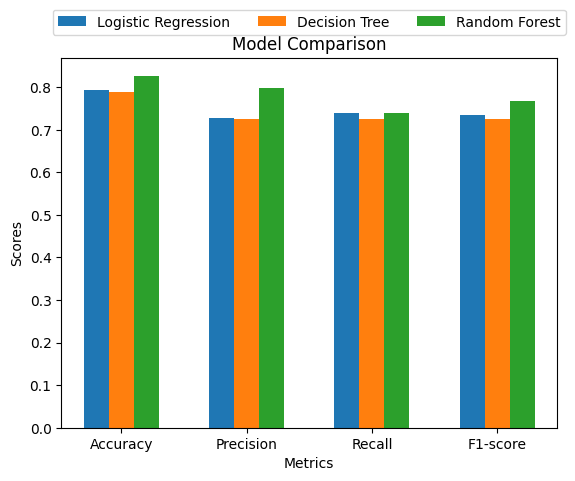

In [38]:
import numpy as np
# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
logreg_scores = [logreg_acc, logreg_precision, logreg_recall, logreg_f1]
dt_scores = [dt_acc, dt_precision, dt_recall, dt_f1]
rf_scores = [rf_acc, rf_precision, rf_recall, rf_f1]

index = np.arange(len(metrics))
bar_width = 0.2

plt.bar(index, logreg_scores, bar_width, label='Logistic Regression')
plt.bar(index + bar_width, dt_scores, bar_width, label='Decision Tree')
plt.bar(index + 2*bar_width, rf_scores, bar_width, label='Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks(index + bar_width, metrics)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for each model
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_dt = confusion_matrix(y_test, y_pred_rf)

# Normalize the confusion matrices to get the rate of correct and incorrect predictions
conf_matrix_logreg_norm = conf_matrix_logreg.astype('float') / conf_matrix_logreg.sum(axis=1)[:, np.newaxis]
conf_matrix_tree_norm = conf_matrix_tree.astype('float') / conf_matrix_tree.sum(axis=1)[:, np.newaxis]
conf_matrix_dt_norm = conf_matrix_dt.astype('float') / conf_matrix_dt.sum(axis=1)[:, np.newaxis]

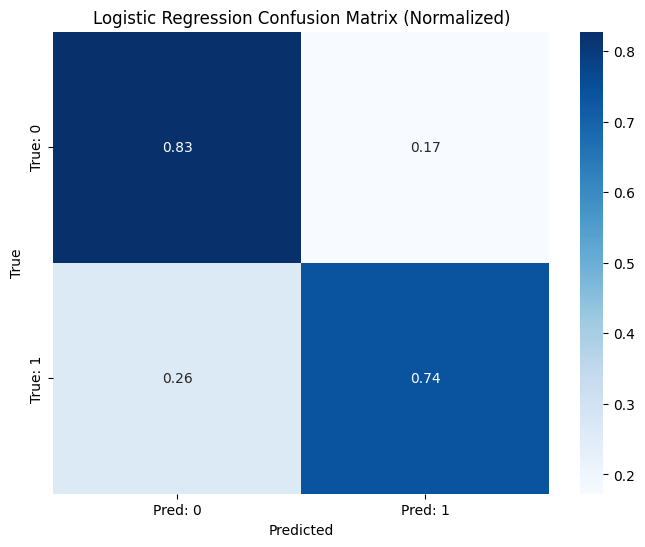

In [40]:
# Plot the confusion matrices as individual heatmaps

# Logistic Regression Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg_norm, annot=True, cmap="Blues", fmt=".2f", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Logistic Regression Confusion Matrix (Normalized)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

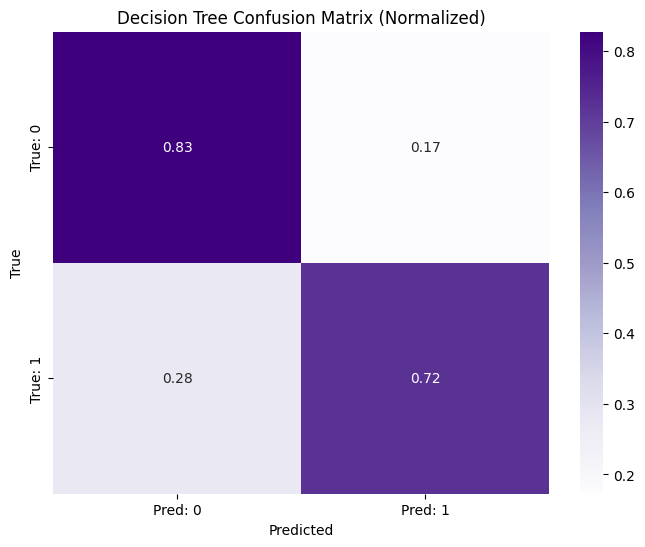

In [41]:
# Decision Tree Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree_norm, annot=True, cmap="Purples", fmt=".2f", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Decision Tree Confusion Matrix (Normalized)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

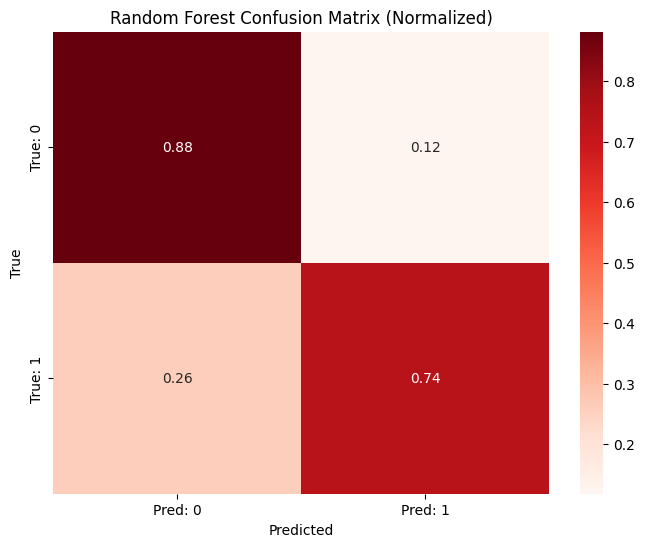

In [42]:

# Random Forest Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_norm, annot=True, cmap="Reds", fmt=".2f", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Random Forest Confusion Matrix (Normalized)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()